In [1]:
%%capture
from __future__ import print_function, division
import appmode
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import Output
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import Javascript
import pandas as pd
from IPython.display import display as display
from ipywidgets import HBox, VBox
from collections import OrderedDict
from fuzzywuzzy import process 
from fuzzywuzzy import fuzz
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 90
pd.options.display.width = 270
pd.options.display.expand_frame_repr = True
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from io import StringIO
import csv
import os
import os.path
import re
from bs4 import BeautifulSoup as BeautifulSoup
from openpyxl import Workbook as Workbook
#import pixiedust
#import pixiedust_node
#import pixiedust_rosie



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-H&amp;K-Lawyer-Notebook" data-toc-modified-id="The-H&amp;K-Lawyer-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The H&amp;K Lawyer Notebook</a></span><ul class="toc-item"><li><span><a href="#Classification-Tool" data-toc-modified-id="Classification-Tool-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Classification Tool</a></span></li><li><span><a href="#Data-Tool" data-toc-modified-id="Data-Tool-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Tool</a></span></li><li><span><a href="#Bulk-Compare" data-toc-modified-id="Bulk-Compare-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Bulk Compare</a></span></li><li><span><a href="#Fuzzy-Searching" data-toc-modified-id="Fuzzy-Searching-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Fuzzy Searching</a></span></li><li><span><a href="#Find-Precedent" data-toc-modified-id="Find-Precedent-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Find Precedent</a></span></li><li><span><a href="#QuickCAN" data-toc-modified-id="QuickCAN-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>QuickCAN</a></span></li><li><span><a href="#QuickCAR" data-toc-modified-id="QuickCAR-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>QuickCAR</a></span></li><li><span><a href="#Signature-Page-Generator" data-toc-modified-id="Signature-Page-Generator-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Signature Page Generator</a></span></li><li><span><a href="#Closing-Binder-Generator" data-toc-modified-id="Closing-Binder-Generator-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Closing Binder Generator</a></span></li></ul></li></ul></div>

In [125]:
def save_list_as_excel(path, clean_sent_list, raw_sent_list):
    wb = Workbook()
    ws = wb.active
    column_cell_A = 'A'
    column_cell_B = 'B'
    column_cell_C = 'C'
    ws[column_cell_A + str(1)] = 'text'
    ws[column_cell_B + str(1)] = 'label'
    ws[column_cell_C + str(1)] = 'raw'
    list_len = len(clean_sent_list)
    for i in range(0, list_len):
        ws[column_cell_A + str(i + 2)] = clean_sent_list[i]
        ws[column_cell_B + str(i + 2)] = 'label'
        ws[column_cell_C + str(i + 2)] = raw_sent_list[i]
    wb.save(path)
    print('Excel write complete')


def html_from_file_no_tags(file_path):
    with open(file_path, 'rb') as myfile:
        raw_text = myfile.read()
    bsObj = BeautifulSoup(raw_text, 'lxml').text
    return bsObj


def normalize_sent(sent):
    wpt = nltk.WordPunctTokenizer()
    stop_words = nltk.corpus.stopwords.words('english')
    sent = re.sub(r'[^a-zA-Z\s]', '', sent, re.I | re.A)
    sent = sent.strip()
    tokens = wpt.tokenize(sent)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    sent = ' '.join(filtered_tokens).lower()
    return sent


def html_from_file_no_tags(file_path):
    with open(file_path, 'rb') as myfile:
        raw_text = myfile.read()
    bsObj = BeautifulSoup(raw_text, 'lxml').text
    return bsObj


def load_normal_with_stopwords(path):
    doc = str(load_raw(path))
    return normalize_document_return_list(doc)


def load_normal_no_stopwords(path):
    doc = load_raw(path)
    norm = normalize_document_return_list(doc)
    clean_sent = []
    for sent in norm:
        clean = remove_stop_words(sent)
        clean_sent.append(clean)
    return clean_sent


def list_from_directory(path):
    list_of_text = []
    for file in os.listdir(path):
        filename = os.fsdecode(file)
        file_path = path + filename
        text = load_raw(file_path)
        text = str(text)
        list_of_text.append(text)


def load_excel(path):
    print('finish')


def load_list_from_csv(path):
    with open(path, 'r') as f:
        reader = csv.reader(f)
        list_raw = list(reader)
        list_clean = []
        for i in list_raw:
            x = ''.join(i)
            list_clean.append(x)
        list_clean_two = []
        for i in list_clean:
            x = ''.join(i)
            list_clean_two.append(x)
        return list_clean_two


def load_raw(path, tags=False):
    if path.endswith('html'):
        if (tags):
            return html_from_file_tags(path)
        else:
            return html_from_file_no_tags(path)
    elif path.endswith('.txt'):
        return str(text_from_file(path))
    else:
        try:
            return str(text_from_binary(path))
        except:
            print('Failed to load as binary. Try reader that accepts url as argument (e.g., html_from_web_tags(url) or html_from_web_no_tags(url)).')


def text_from_binary(file_path):
    #text = textract.process(file_path, method='tesseract', language='eng')
    text = 'Not set up for binary'
    return text.decode('unicode_escape').encode('utf-8', 'ignore').strip()


def html_from_file_tags(file_path):
    with open(file_path, 'rb') as myfile:
        raw_text = myfile.read()
    return raw_text


def html_from_web_no_tags(url):
    response = urlopen(url)
    bsObj = BeautifulSoup(response, 'lxml').text
    return bsObj


def html_from_web_tags(url):
    response = urlopen(url)
    tagged_text = response.read()
    return tagged_text


def text_from_file(file_path):
    with open(file_path, 'rb') as myfile:
        raw_text = myfile.read()
    return raw_text


def remove_stop_words(doc):
    wpt = nltk.WordPunctTokenizer()
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens).lower()
    return doc


def normalize_document_return_list(doc):
    wpt = nltk.WordPunctTokenizer()
    stop_words = nltk.corpus.stopwords.words('english')
    list_of_clean_sents = []
    sent_list = tokenize.sent_tokenize(str(doc))
    for sent in sent_list:
        sent = re.sub(r'[^a-zA-Z\s]', '', sent, re.I | re.A)
        sent = sent.strip()
        tokens = wpt.tokenize(sent)
        filtered_tokens = [token for token in tokens if token not in stop_words]
        sent = ' '.join(filtered_tokens).lower()
        list_of_clean_sents.append(sent)
    return list_of_clean_sents


def tokenize_and_stem(text):
    stemmer = SnowballStemmer("english")
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    joined_text = " ".join(stems)
    print(joined_text)
    return joined_text

def create_progress_bar():
    in_progress = widgets.IntProgress(
    value=0,
    min=0,
    max=10,
    step=1,
    visible=False,
    description='Status:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)
    return in_progress

def change_progress_bar(name, percent_complete):
    name.value = percent_complete

def is_progress_bar_visible(name, visible):
    name.visible = visible
    
def clear_output(name):
    name.close
    
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot3D():
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2)
    Z = np.sin(R)
    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_zlim(-1.01, 1.01)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

![alt text](https://s3.amazonaws.com/blaze4/HK+logo.png)

# The H&K Lawyer Notebook

A collection of simple, yet powerful tools for lawyers to do their jobs better and more efficiently. By leveraging data analytics, natural language processing, machine learning, and other technology solutions, users are able to produce better quality work faster and e more efficient. Many of these tools are still under active development, so the H&K Lawyer Notebook is reserved for our more intrepid lawyers.

***

## Classification Tool

Classify text using one of several trained machine learning models.

In [150]:
#TODO Create seperate lists for individual items for other subject matters
#TODO Add training back-end

results = ''
out = Output()
out_aux = Output()
out_progress = Output()

model_selection = widgets.RadioButtons(
    options=['Google AutoML', 'SKLearn', 'TensorFlow', 'Keras', 'Gensim'],
     value='SKLearn',
    description='Select model:',
    disabled=False
)

subject_matter_selection = widgets.RadioButtons(
    options=['Litigation', 'Finance', 'Leasing', 'Private Equity', 'Corporate M&A', 'Bond Financing'],
     value='Finance',
    description='Area:',
    disabled=False
)

file_path_text = widgets.Text(              
    value='credit.txt',
    placeholder='Type something',
    description='Filename:',
    disabled=False
)

#if subject_matter_selection == 'Finance':
clause_selection = widgets.SelectMultiple(
    options=['All', 'MAC_definition', 'commitment_fee', 'change_control', 'change_control_prepayment', 'debt_issuance_prepayment', 'default_interest', 'disposition_assets_prepayment', 'equity_issuance_prepayment', 'eurodollar_rate', 'excess_cash_flow', 'fixed_charge_ratio', 'lender_inspection_rights', 'margin_leverage_ratio', 'margin_rating', 'monetary_default', 'net_worth', 'restricted_payments', 'Amendments_Consent', 'secured_facility', 'Amendments_Consent', 'unused_fee', 'voluntary_prepayment'],
    value=['All'],
    rows=10,
    description='Clauses:',
    disabled=False
)

model_name = widgets.RadioButtons(
    options=['SVM', 'LSTM', 'NB'],
    value='SVM',
    description='Model:',
    disabled=False
)

save_file_path = widgets.Text(              
    value='model.pickle',
    placeholder='Type something',
    description='Path to Save:',
    disabled=False
)

model_training_material = widgets.Text(              
    value='training.xlsx',
    placeholder='Type something',
    description='Train Docs:',
    disabled=False
)

button = widgets.Button(description="Submit")
button.style.button_color = 'steelblue'

download_button = widgets.Button(
    description='Download Excel',
    disabled=False
)
download_button.style.button_color = 'Honeydew'


refresh_button = widgets.Button(
    description='Clear Output',
    disabled=False,
    button_style='info'
)
refresh_button.style.button_color = 'LightSlateGray'



tab1 = VBox(children=[HBox(children=[file_path_text])])
tab2 = VBox(children=[HBox(children=[model_selection, subject_matter_selection, clause_selection])])
tab3 = VBox(children=[HBox(children=[model_name, model_training_material, save_file_path])])
tab = widgets.Tab(children=[tab2, tab1, tab3])
tab.set_title(0, 'Configure')
tab.set_title(1, 'Predict')
tab.set_title(2, 'Training')
HBox_classify = HBox(children=[button, refresh_button, download_button])
VBox_classify = VBox(children=[tab, HBox_classify])
with out_aux:
    display(VBox_classify)

returned_values = {} 

def clear_output():
    out.clear_output()
    out.close()

@download_button.on_click
def download_button_clicked(b):
    output = returned_values['df_output']
    writer = pd.ExcelWriter('classification_results.xlsx')
    output.to_excel(writer,'Sheet1')
    writer.save()
    download_button.description = 'Download complete'

@refresh_button.on_click
def refresh_button_clicked(b):
    out.clear_output()
    download_button.description = 'Download Excel'

#@out.capture()
@button.on_click
def on_button_clicked(b):
    clear_output()
    download_button.description = 'Download Excel'
    in_progress = create_progress_bar()
    display(in_progress)
    change_progress_bar(in_progress, 0)
    #Load training corpus
    #df = pd.read_excel('/home/ec2-user/SageMaker/data_b.xlsx') #Uncomment if running SageMaker
    df = pd.read_excel('https://s3.amazonaws.com/blaze4/data_b.xlsx') #Uncomment if running local
    df = df.sample(frac=1, axis=1).reset_index(drop=True)
    df = df[pd.notnull(df['Text'])]
    df = df.drop_duplicates()
    change_progress_bar(in_progress, 2)
    col = ['Label', 'Text']
    df = df[col]
    df.columns = ['Label', 'Text']
    df = df.sample(frac=1).reset_index(drop=True)
    #Vectorize and transform training corpus
    df['category_id'] = df['Label'].factorize()[0]
    change_progress_bar(in_progress, 4)
    category_id_df = df[['Label', 'category_id']].drop_duplicates().sort_values('category_id')
    category_to_id = dict(category_id_df.values)
    id_to_category = dict(category_id_df[['category_id', 'Label']].values)
    #Train model
    X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], random_state = 0)
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(X_train)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    clf = LinearSVC().fit(X_train_tfidf, y_train)
    change_progress_bar(in_progress, 6)
    #Load document to be reviewed, clause segment and normalize
    current_raw_sent_list = []
    clean_raw_list = []
    current_clean_sent_list = []
    sent_list = sent_tokenize(load_raw(file_path_text.value))
    for sent in sent_list:
        clean_sent = normalize_sent(sent)
        current_clean_sent_list.append(clean_sent)
        current_raw_sent_list.append(sent)
    in_progress.value = 7
    change_progress_bar(in_progress, 7)
    for sent in current_raw_sent_list:
        clean_raw = re.sub("\xe2", " ", sent)
        clean_raw = re.sub("\x80", " ", clean_raw)
        clean_raw = re.sub(r"\n\n", " ", clean_raw)
        clean_raw = re.sub(r'\n', " ", clean_raw)
        clean_raw = re.sub("\xe2\x80\x9c", " ", clean_raw)
        clean_raw = re.sub("each\nRevolving+", "each Revolving", clean_raw)
        clean_raw = re.sub("\xe2\x80\x9cRequired", "Required", clean_raw)
        clean_raw = re.sub("\xe2\x80\x9c", ' ', clean_raw)
        clean_raw = re.sub("\xe2\x80\x99s", ' ', clean_raw)
        clean_raw = re.sub("\sn\s", ' ', clean_raw)
        clean_raw = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", clean_raw)
        clean_raw_list.append(clean_raw)
    #Load normalized sentences into dataframe
    df_current = pd.DataFrame(columns=['label', 'raw', 'clean'])
    df_current['clean'] = current_clean_sent_list
    df_current['raw'] = clean_raw_list
    change_progress_bar(in_progress, 8)
    #Iterate through dataframe, predict clause type and record to [label] column in df
    for index, row in df_current.iterrows():
        test = []
        test.append(df_current['clean'][index])
        X_test=count_vect.transform(test)
        z = clf.predict(X_test)
        df_current['label'][index] = z[0]
    change_progress_bar(in_progress, 10)
    if clause_selection.value[0] == 'All':
        clause_selection.value = ['MAC_definition', 'commitment_fee', 'change_control', 'change_control_prepayment', 'debt_issuance_prepayment', 'default_interest', 'disposition_assets_prepayment', 'equity_issuance_prepayment', 'eurodollar_rate', 'excess_cash_flow', 'fixed_charge_ratio', 'lender_inspection_rights', 'margin_leverage_ratio', 'margin_rating', 'monetary_default', 'net_worth', 'restricted_payments', 'Amendments_Consent', 'secured_facility', 'Amendments_Consent', 'unused_fee', 'voluntary_prepayment']
    df_output = df_current[df_current.apply(lambda x: x['label'] in clause_selection.value, axis=1)]
    returned_values['df_output'] = df_output 
    in_progress.close()
    with out:
        display(df_output)

#button.on_click(on_button_clicked)       
#download_button.on_click(download_button_clicked)   
#refresh_button.on_click(refresh_button_clicked) 
out


## Data Tool

A tool for organizing and visualizing data.

In [39]:
#TODO design user input box; add charting; replace data set with car ride specific examples.

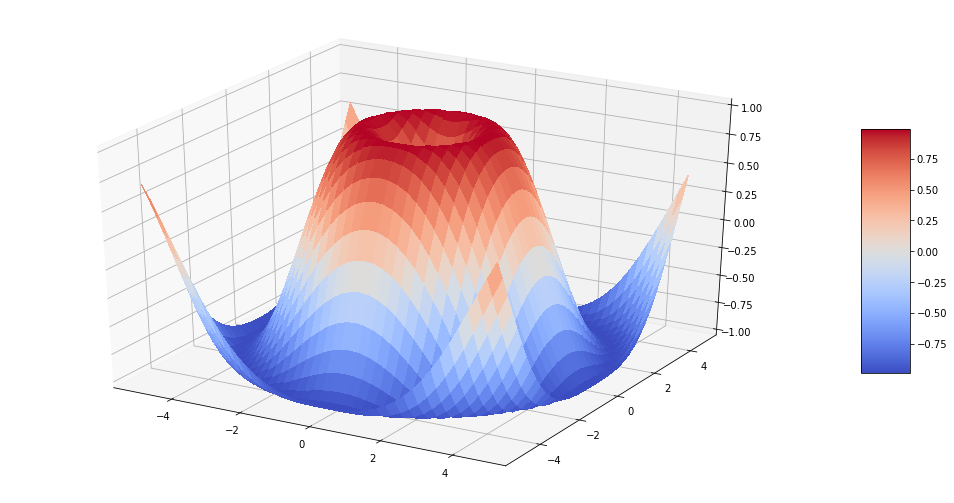

In [130]:
data_button = widgets.Button(description="Submit")
data_button.style.button_color = 'steelblue'

chart_submit_button = widgets.Button(description="ChartIt")
chart_submit_button.style.button_color = 'lightblue'

data_out = widgets.Output()#layout={'border': '1px solid black'})

data_refresh_button = widgets.Button(
    description='Clear Output',
    disabled=False,
    button_style='info'
)

@data_refresh_button.on_click
def data_refresh_button_clicked(b):
    data_out.clear_output()

@chart_submit_button.on_click
#@data_out.capture(clear_output=True, wait=True)
def chart_it(b):
    c_in_progress = create_progress_bar()
    display(c_in_progress)
    change_progress_bar(c_in_progress, 2)
    if data_selection.value == 'employee_set':
        df = pd.read_csv('https://s3.amazonaws.com/blaze4/HR_comma_sep.csv')
    else:
        #df = pd.read_csv('https://s3.amazonaws.com/blaze4/trip_stats_taz.csv')
        df = pd.read_csv('/Users/josiasdewey/jupyter/notebooks/trip_stats_taz.csv')
    df_min = df[0:2000]
    change_progress_bar(c_in_progress, 4)
    if chart_selection.value == '3D Plot':
        plot3D()
        change_progress_bar(c_in_progress, 10)
        c_in_progress.close()
    else:
        bp_x = df_min[data_points_selection_x.value]
        bp_y = df_min[data_points_selection_y.value]
        bp_z = df_min[data_points_selection_z.value]
        if chart_selection.value == '3D Plot':
            plot3D()
        if chart_selection.value == 'Scatter Plot':
            cht = plt.scatter(bp_x, bp_y,
                 color="blue", label=r"Scatter")
        if chart_selection.value == 'Bar Graph':
            cht = plt.bar(bp_x, bp_y,
                 color="blue", label=r"Bar")
        if chart_selection.value == 'Bar Graph':
            cht = plt.bar(bp_x, bp_y,
                 color="blue", label=r"Bar")
        xlim_max = (1.25 * (df_min[data_points_selection_x.value].max()))
        ylim_max = (1.25 * (df_min[data_points_selection_y.value].max()))
        xlim_min = (-1.25 * (df_min[data_points_selection_x.value].min()))
        ylim_min = (-1.25 * (df_min[data_points_selection_y.value].min()))
        change_progress_bar(c_in_progress, 6)
        plt.xlim(xlim_min, xlim_max)
        plt.ylim(ylim_min, ylim_max)
        plt.xlabel(data_points_selection_x.value)
        plt.ylabel(data_points_selection_y.value)
        plt.title(r"Relationship between %s and %s" % (data_points_selection_x.value, data_points_selection_y.value) )
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 18
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        plt.legend(loc="lower left")
        change_progress_bar(c_in_progress, 8)
        plt.ion()
        plt.show()
        change_progress_bar(c_in_progress, 10)
        c_in_progress.close()
        display(cht)
    
#@data_out.capture(clear_output=True, wait=True)
@data_button.on_click
def load_data(b):
    data_out.close()
    d_in_progress = create_progress_bar()
    display(d_in_progress)
    change_progress_bar(d_in_progress, 2)
    if data_selection.value == 'employee_set':
        df = pd.read_csv('https://s3.amazonaws.com/blaze4/HR_comma_sep.csv')
    else:
        #df = pd.read_csv('https://s3.amazonaws.com/blaze4/trip_stats_taz.csv')
        df = pd.read_csv('/Users/josiasdewey/jupyter/notebooks/trip_stats_taz.csv')
    df_min = df[0:2000]
    display(df_min)
    change_progress_bar(d_in_progress, 4)
    returned_values['df_data'] = df_min
    change_progress_bar(d_in_progress, 8)
    data_points_selection_x.options = list(df_min)
    data_points_selection_y.options = list(df_min)
    data_points_selection_z.options = list(df_min)
    display(df_min)
    change_progress_bar(d_in_progress, 10)
    d_in_progress.close()
    with data_out:
        display(df_min)
    
custom_file_path_text = widgets.Text(              
    value='employee_set.xlsx',
    placeholder='Type something',
    description='Filename:',
    disabled=False
)

data_selection = widgets.SelectMultiple(
    options=['employee_set', 'ride_share_data_SF'],
    value=['employee_set'],
    rows=10,
    description='Data Set:',
    disabled=False
)

chart_selection = widgets.RadioButtons(
    options=['Scatter Plot', '3D Plot', 'Bar Graph', 'Pie Graph', 'Line Graph'],
    value='Scatter Plot',
    description='Select chart:',
    disabled=False
)

returned_values = {'df_data': ['load data', 'load data']}
df = returned_values['df_data']
df_col = list(df)
data_points_selection_x = widgets.RadioButtons(
    options=df_col,
    value='load data',
    description='x-axis:',
    disabled=False
)

data_points_selection_y = widgets.RadioButtons(
    options=df_col,
    value='load data',
    description='y-axis:',
    disabled=False
)

data_points_selection_z = widgets.RadioButtons(
    options=df_col,
    value='load data',
    description='z-axis:',
    disabled=False
)

tab1 = VBox(children=[HBox(children=[data_selection, custom_file_path_text])])
tab2 = VBox(children=[HBox(children=[chart_selection, 
                                     data_points_selection_x,
                                     data_points_selection_y,
                                     data_points_selection_z])])
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Data Sets')
tab.set_title(1, 'Charting')
#display(VBox(children=[tab, ]))
HBox_classify = HBox(children=[data_button, chart_submit_button, data_refresh_button])
VBox_classify = VBox(children=[tab, HBox_classify])
display(VBox_classify)

#data_button.on_click(load_data)
#chart_submit_button.on_click(chart_it)
data_out

## Bulk Compare

Use this bulk comparison tool to compare a large number of documents against a common base form.  For example, compare lease agreements against a lease form to determine deviations from approved form. 

In [ ]:
button_compare = widgets.Button(description="Submit")
button_compare.style.button_color = 'lightblue'
out2 = widgets.Output(layout={'border': '1px solid black'})

@out2.capture()
@button_compare.on_click
def on_click(b):
    doc_1_raw_sent_list = []
    doc_1_clean_sent_list = []
    sent_list = sent_tokenize(load_raw(file_path_text_1.value))
    for sent in sent_list:
        clean_sent = normalize_sent(sent)
        doc_1_clean_sent_list.append(clean_sent)
        doc_1_raw_sent_list.append(sent)
    df_doc_1 = pd.DataFrame(columns=['raw', 'clean'])
    df_doc_1['clean'] = doc_1_clean_sent_list
    df_doc_1['raw'] = doc_1_raw_sent_list
    
    doc_2_raw_sent_list = []
    doc_2_clean_sent_list = []
    sent_list = sent_tokenize(load_raw(file_path_text_2.value))
    for sent in sent_list:
        clean_sent = normalize_sent(sent)
        doc_2_clean_sent_list.append(clean_sent)
        doc_2_raw_sent_list.append(sent)
    df_doc_2 = pd.DataFrame(columns=['raw', 'clean'])
    df_doc_2['clean'] = doc_2_clean_sent_list
    df_doc_2['raw'] = doc_2_raw_sent_list
    df_results = pd.DataFrame(columns=['query', 'match', 'strength'])
    query = df_doc_1['clean']
    choices = df_doc_2['clean']
    query_list = []
    found_list = []
    strength_list = []
    for q in query:
        match = process.extractOne(q, choices=choices, scorer=fuzz.token_sort_ratio, score_cutoff=0)
        if match != None:
            index = match[2]
            if match[1] >= compare_slider.value:
                found = match[0]
                strength = match[1]
            else:
                found = 'None'
                strength = 'N/A'
            query_list.append(q)
            found_list.append(choices[index])
            strength_list.append(strength)
    df_results['query'] = query_list
    df_results['found']= found_list
    df_results['strength'] = strength_list
    display(df_results)

file_path_text_1 = widgets.Text(
    value='base.txt',
    placeholder='Type something',
    description='Base:',
    disabled=False
)

file_path_text_2 = widgets.Text(
    value='filename and path',
    placeholder='Type something',
    description='Directory:',
    disabled=False
)

s = widgets.Text(
    value='filename and path',
    placeholder='Type something',
    description='Output path:',
    disabled=False
)

t = widgets.Text(
    value='filename and path',
    placeholder='Type something',
    description='Compare:',
    disabled=False
)

tab1 = VBox(children=[HBox(children=[file_path_text_1, file_path_text_2])])
tab2 = VBox(children=[HBox(children=[s])])
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Compare')
tab.set_title(1, 'Configure')
display(VBox(children=[tab, button_compare]))
display(out2)

## Fuzzy Searching

Use "fuzzy" searching to compare any number of items (the 'Query') against a large groups of possible matches (the 'Search'). For example, a client requests we confirm the destruction of files relating to several hundred matters, where the matter description for each must be cross checked against several thousand entries in our file storage list. This tool leverages fuzzy matching in order to identify matches undetected by pure booleen searches (e.g., "FIRST INTERNATIONAL" captured even if search query is "INTL FIRS")

In [ ]:
fuzzy_button = widgets.Button(description="Submit")
fuzzy_button.style.button_color = 'lightblue'

fuzzy_out = widgets.Output(layout={'border': '1px solid black'})

@fuzzy_out.capture
@fuzzy_button.on_click
def on_click(b):
    doc_1_raw_sent_list = []
    doc_1_clean_sent_list = []
    sent_list = sent_tokenize(load_raw(file_path_text_1.value))
    for sent in sent_list:
        clean_sent = normalize_sent(sent)
        doc_1_clean_sent_list.append(clean_sent)
        doc_1_raw_sent_list.append(sent)
    df_doc_1 = pd.DataFrame(columns=['raw', 'clean'])
    df_doc_1['clean'] = doc_1_clean_sent_list
    df_doc_1['raw'] = doc_1_raw_sent_list
    doc_2_raw_sent_list = []
    doc_2_clean_sent_list = []
    sent_list = sent_tokenize(load_raw(file_path_text_2.value))
    for sent in sent_list:
        clean_sent = normalize_sent(sent)
        doc_2_clean_sent_list.append(clean_sent)
        doc_2_raw_sent_list.append(sent)
    df_doc_2 = pd.DataFrame(columns=['raw', 'clean'])
    df_doc_2['clean'] = doc_2_clean_sent_list
    df_doc_2['raw'] = doc_2_raw_sent_list
    df_results = pd.DataFrame(columns=['query', 'match', 'strength'])
    query = df_doc_1['clean']
    choices = df_doc_2['clean']
    query_list = []
    found_list = []
    strength_list = []
    for q in query:
        match = process.extractOne(q, choices=choices, scorer=fuzz.token_sort_ratio, score_cutoff=0)
        if match != None:
            index = match[2]
            if match[1] >= compare_slider.value:
                found = match[0]
                strength = match[1]
            else:
                found = 'None'
                strength = 'N/A'
            query_list.append(q)
            found_list.append(choices[index])
            strength_list.append(strength)
    df_results['query'] = query_list
    df_results['found']= found_list
    df_results['strength'] = strength_list
    display(df_results)

file_path_text_1 = widgets.Text(
    value='query_set.xlsx',
    placeholder='Type something',
    description='Query:',
    disabled=False
)

file_path_text_2 = widgets.Text(
    value='search_set.xlsx',
    placeholder='Type something',
    description='Search:',
    disabled=False
)

number_returned = widgets.Dropdown(
    options=['1', '2', '3', '4'],
    value='2',
    description='Volume:',
    disabled=False,
)

t = widgets.Text(
    value='filename and path',
    placeholder='Type something',
    description='Compare:',
    disabled=False
)

fuzzy_slider = widgets.FloatSlider(
    value=0,
    base=100,
    min=0, # max exponent of base
    max=100, # min exponent of base
    step=0.2, # exponent step
    description='Similarity:'
)

tab1 = VBox(children=[HBox(children=[file_path_text_1, file_path_text_2])])
tab2 = VBox(children=[HBox(children=[number_returned, fuzzy_slider])])
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Query Parameters')
tab.set_title(1, 'Configure')
VBox(children=[tab, fuzzy_button])
display(tab)
display(fuzzy_button)
display(fuzzy_out)

## Find Precedent
Quickly search one or more curated clause banks for similar clauses.  Also, the user can identify form documents from which a particular agreememt originates.  The user can set a minimum similarity threshold to filter out less relevant clauses.  

In [ ]:

find_precedent_button = widgets.Button(description="Submit")
find_precedent_button.style.button_color = 'lightblue'

find_precedent_out = widgets.Output(layout={'border': '1px solid black'})
#find_precedent_out = widgets.Output()

precedent_compare_slider = widgets.FloatSlider(
    value=0,
    base=100,
    min=0, # max exponent of base
    max=100, # min exponent of base
    step=0.2, # exponent step
    description='Similarity:'
)

find_precedent_returned_values = {}

@find_precedent_out.capture()
#@find_precedent_button.on_click
def find_precedent_on_click(b):
    doc_1_raw_sent_list = []
    doc_1_clean_sent_list = []
    sent_list = sent_tokenize(find_precedent_text_area.value)
    for sent in sent_list:
        clean_sent = normalize_sent(sent)
        doc_1_clean_sent_list.append(clean_sent)
        doc_1_raw_sent_list.append(sent)
    df_doc_1 = pd.DataFrame(columns=['raw', 'clean'])
    df_doc_1['clean'] = doc_1_clean_sent_list
    df_doc_1['raw'] = doc_1_raw_sent_list
    df_precedent = pd.read_pickle('credit_pickle')
    df_precedent2 = pd.read_pickle('/Users/josiasdewey/jupyter/Misc/d/credit_pickle2')
    df_precedent = pd.concat([df_precedent, df_precedent2], axis=0)
    df_results = pd.DataFrame(columns=['strength', 'query', 'match_raw'])
    query = df_doc_1['clean']
    choices = df_precedent['clean']
    query_list = []
    found_list = []
    found_raw_list = []
    strength_list = []
    for q in query:
        match = process.extract(q, choices=choices, scorer=fuzz.token_sort_ratio, limit=int(find_precedent_number_returned.value))
        for tup in match:
            if tup != None:
                index = tup[2]
                if tup[1] >= precedent_compare_slider.value:
                    found = tup[0]
                    found_raw = tup[0] #df_precedent['raw'][index]
                    strength = tup[1]
                    if q in query_list:
                        query_list.append('')
                    else:
                        query_list.append(q)
                    found_list.append(df_precedent['clean'][index])
                    strength_list.append(strength)
                    found_raw_list.append(found_raw)
    df_results['query'] = query_list
    #df_results['found']= found_list
    df_results['strength'] = strength_list
    df_results['match_raw'] = found_raw_list
    display(find_precedent_download_button)
    display(find_precedent_refresh_button)
    find_precedent_returned_values['df_results'] = df_results 
    display(df_results)

find_precedent_number_returned = widgets.Dropdown(
    options=['1', '2', '3', '4', '5', '6','7', '8', '9', '10', '25', '50', '100'],
    value='10',
    description='Return:',
    disabled=False,
)
    
find_precedent_subject_matter_selection = widgets.RadioButtons(
    options=['Litigation', 'Finance', 'Leasing', 'Private Equity', 'Corporate M&A', 'Bond Financing'],
     value='Finance',
    description='Area:',
    disabled=False
)

find_precedent_text_area = widgets.Textarea(
    value='Since February 1, 2014, there has been no material adverse change in the business, assets, operations or condition of Holdings and its Subsidiaries, taken as a whole.',
    placeholder='',
    description='Clause Text:',
    width='500px',
    height='50%',
    disabled=False
)

find_precedent_file_path_text = widgets.Text(              
    value='credit.txt',
    placeholder='Type something',
    description='Filename:',
    disabled=False
)

in_progress = widgets.IntProgress(
    value=0,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

find_precedent_download_button = widgets.Button(
    description='Download Excel',
    disabled=False,
    button_style='success'
)

find_precedent_refresh_button = widgets.Button(
    description='Clear Output',
    disabled=False,
    button_style='info'
)

def find_precedent_download_button_clicked(b):
    output = find_precedent_returned_values['df_results']
    writer = pd.ExcelWriter('classification_results.xlsx')
    output.to_excel(writer,'Sheet1')
    writer.save()
    find_precedent_download_button.description = 'Download complete'

refresh_button = widgets.Button(
    description='Clear Output',
    disabled=False,
    button_style='info'
)

def find_precedent_refresh_button_clicked(b):
    out.clear_output()


tab1 = VBox(children=[HBox(children=[find_precedent_text_area, find_precedent_subject_matter_selection, find_precedent_number_returned, precedent_compare_slider])])
tab2 = VBox(children=[HBox(children=[find_precedent_file_path_text, find_precedent_subject_matter_selection, find_precedent_number_returned, precedent_compare_slider])])
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Search by Clause')
tab.set_title(1, 'Search by Document/File')
display(VBox(children=[tab, find_precedent_button]))

find_precedent_button.on_click(find_precedent_on_click)
find_precedent_download_button.on_click(find_precedent_download_button_clicked)
find_precedent_refresh_button.on_click(find_precedent_refresh_button_clicked)
display(find_precedent_out)


## QuickCAN
Computer generated revisions to contracts based on precedent clause database.  Machine learning algorithms and fuzzy matching are used to incorporate revisions made to similar text in precedent clauses.

In [ ]:
x = widgets.RadioButtons(
    options=['finance', 'leasing', 'private equity', 'corporate M&A', 'bond financing'],
     value='finance',
    description='Type:',
    disabled=False
)
display(x)

IntSlider = widgets.SelectionSlider(
    options=['Aggressive', 'Favorable', 'Neutral', 'Must Haves'],
    value='Aggressive',
    description='Set Intensity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

display(IntSlider)

y = widgets.Text(
    value='filename and path',
    placeholder='Type something',
    description='Filename:',
    disabled=False
)

display(y)

from IPython.display import display
button = widgets.Button(description="Submit")
button.style.button_color = 'lightblue'
display(button)

def on_button_clicked(df_current, df_precedent):
    print('')
    #run_match(df_current, df_precedent)


button.on_click(on_button_clicked(y.value, y.value))

## QuickCAR

Computer generated responses to requests for production and interrogetories. Machine learning algorithms and fuzzy matching are used to incorporate historical responses to similar requests.  Will automatically generate a first draft of a response.

## Signature Page Generator
***
Generate signature page packets with the press of a button.

## Closing Binder Generator
***
Automate the preparation of closing binders.

In [ ]:
@button.on_click
def on_click(b):
    pass

lender_widget = widgets.RadioButtons(
    options=['Wells Fargo', 'Bank of America (Private Wealth)', 'Bank of America', 'JPMorgan Chase', 'Ocean Bank', 'Other'],
    value='Ocean Bank',
    description='Lender:',
    disabled=False
)

toggle = widgets.RadioButtons(
    options=['Middle Market', 'Construction Loan', 'Bank Loan', 'Loan Modification', 'ABL Loan', 'Art Loan'],
    value='Bank Loan',
    description='Loan Type:',
    disabled=False
)

title_textbox = widgets.Text(
    value='RM',
    description='Title:',
)

tab1 = VBox(children=[HBox(children=[lender_widget, toggle])])
tab2 = VBox(children=[HBox(children=[title_textbox,])])
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Loan Details')
tab.set_title(1, 'Contacts')
VBox(children=[tab, button])

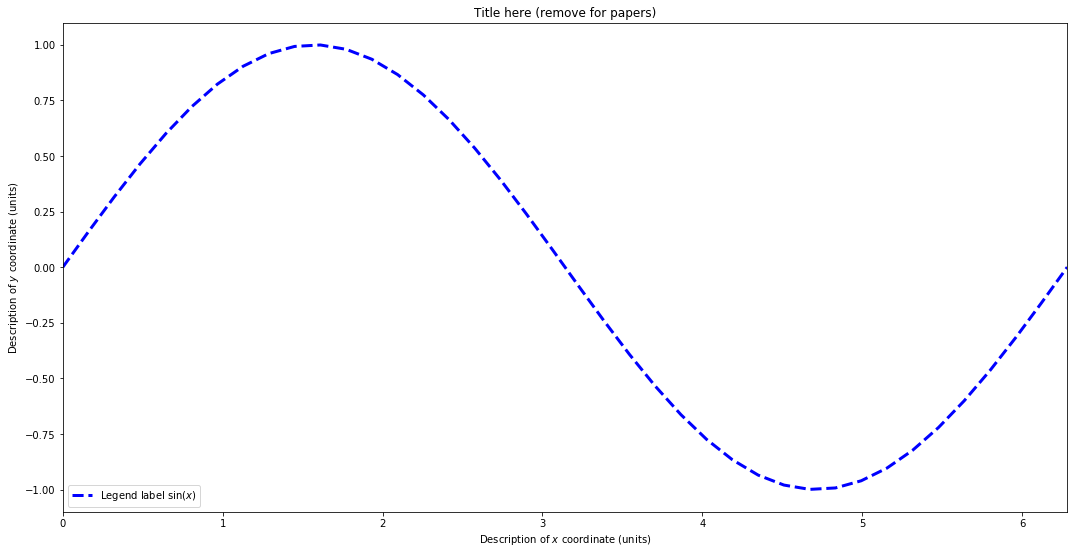

In [99]:
# Silly example data
bp_x = np.linspace(0, 2*np.pi, num=40, endpoint=True)
bp_y = np.sin(bp_x)

# Make the plot
plt.plot(bp_x, bp_y, linewidth=3, linestyle="--",
         color="blue", label=r"Legend label $\sin(x)$")
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Title here (remove for papers)")
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)
plt.legend(loc="lower left")
plt.show()

In [ ]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
tab1 = HBox(children=[VBox(children=[file_path_text])])
tab2 = HBox(children=[VBox(children=[model_selection, subject_matter_selection, clause_selection])])
tab3 = HBox(children=[VBox(children=[model_name, model_training_material, save_file_path])])
tab = widgets.Tab(children=[tab2, tab1, tab3])
tab.set_title(0, 'Configure')
tab.set_title(1, 'Predict')
tab.set_title(2, 'Training')
VBox_classify = VBox(children=[button, refresh_button, download_button])
HBox_classify = HBox(children=[tab, VBox_classify])
with out_aux:
    display(HBox_classify)